# 重点サンプリング

In [27]:
import matplotlib.pyplot as plt
import numpy as np

## 目的分布: $p(z)$

任意の$z$に対して$\tilde{p}(z) = Z_p p(z)$のみが計算できる: パラメタ$a>0, b>0$が所与のものとして,

$$
\tilde{p}(z | a, b) = b^a z^{a-1} \exp (-bz)
$$

ただし, $z>0$とする.

In [28]:
def tilde_p(z, a, b):
    return (b**a) * (z ** (a-1)) * np.exp(-b * z)

print(tilde_p(-1, 2, 1))

-2.718281828459045


以下では, パラメタ$a, b$について

$$
a = 2.75 \\
b = 0.9
$$

とする

In [29]:
a = 2.75
b = 0.9

## 提案分布: $q(z)$

サンプリングが容易な分布. パラメタ$\alpha, \beta$が所与のものとして,

$$
q(z | \alpha, \beta) = \frac{1}{\alpha \pi} \frac{1}{1 + {(z-\beta)}^2/\alpha^2}
$$

累積分布$Q(z)$は,

$$
Q(z) = \int_{-\infty}^{z} q(\zeta | \alpha, \beta) d \zeta = \frac{1}{\pi} \text{Tan}^{-1} \frac{z-\beta}{\alpha} + \frac{1}{2}
$$

累積分布の逆分布$Q^{-1}(x)$は,

$$
Q^{-1}(x) = \alpha \tan \left\{ \pi \left( x - \frac{1}{2} \right) \right\} + \beta
$$

よって, $x \sim \text{Uni}(0, 1)$を$Q^{-1}(x)$で変数変換すれば変換後の変数$z$は$q(z)$上の確率変数となる

In [30]:
def q(z, alpha, beta):
    return 1 / ((alpha * np.pi) * (1 + ((z - beta) / alpha) ** 2))

def sample_q(alpha, beta, size, rng=np.random.default_rng()):
    x = rng.uniform(0,1,size)
    return alpha * np.tan(np.pi * (x - 1/2)) + beta

$q(z)$に要請される性質として, $p(z)$が大きい$z$について$q(z)$は大きくなくてはいけない(その逆もそう), と言うものがある.

$$
\begin{align}
\alpha &= \sqrt{2a-1} \\
\beta &= a-1
\end{align}
$$

とすると形としては良いらしい.

In [31]:
alpha = np.sqrt(2 * a - 1)
beta = a - 1

$4q(z)$の形は$p(z)$のそれと似ていることが分かる.

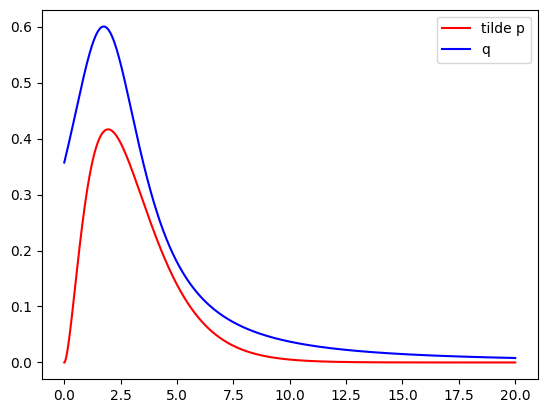

In [32]:
fig, ax = plt.subplots(1, 1)
z = np.linspace(0, 20, 1000)

ax.plot(z, tilde_p(z, a, b), "r-", label="tilde p")
ax.plot(z, 4 * q(z, alpha, beta), "b-", label="q")
ax.legend()

## 重点サンプリングの手順

1. 乱数$\{ z_1, \cdots, z_N \}$を$q(z)$からサンプリング
2. 重み$\{ w_1, \cdots, w_N\}$を計算
3. $w_nf(z_n)$の総和によって期待値を近似

$$
w_n = \frac{\tilde{r}_n}{\sum_\nu \tilde{r}_\nu} = \frac{\tilde{p}(z_n) / q(z_n)}{\sum_\nu \tilde{p}(z_\nu) / q(z_\nu)}
$$

$$
\mathbb{E}[f(z)] = \sum_{n=1}^N w_n f(z_n)
$$

In [33]:
rng = np.random.default_rng()
size = 1000000

# sampling
z = sample_q(alpha, beta, size, rng)

tilde_r = np.zeros_like(z)

counter = 0

for n in range(size):
    if z[n] < 0:
        counter += 1
        continue
    tilde_r[n] = tilde_p(z[n], a, b) / q(z[n], alpha, beta)

w = tilde_r / np.sum(tilde_r)

sample_mean = np.sum(w * z)
sample_var = np.sum(w * z * z) - sample_mean * sample_mean

## 答え合わせ

目的分布$p(z)$は実はガンマ分布$\text{Gam}(z | a, b)$であった:

$$
\text{Gam}(z | a, b) = \frac{b^a z^{a-1} \exp (-bz)}{\Gamma (a)}
$$

これの期待値や分散は以下で与えられる:

$$
\begin{align}
\mathbb{E}[z] &= \frac{a}{b} \\
\text{Var}[z] &= \frac{a}{b^2} \\
\end{align}
$$

サンプリングされた$z$の平均や分散と比較してみる

In [34]:
print("平均, 分散")
print(a/b, a/(b*b))
print(sample_mean, sample_var)

平均, 分散
3.0555555555555554 3.3950617283950617
3.053181487944263 3.3910067934626813


いいね👍